### Preparation

In [111]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

### Introduction

In this notebook we explore the Nemweb dispatch SCADA data from AEMO. The data is free to use for any purpose, when accurately and appropriately attributing AEMO as the author. The data we show here is retrived from the [Nemweb Archive](https://nemweb.com.au/Reports/Archive/) and comprises 5min wind power SCADA data from 2010 to 2023 for 75 Australian wind farms. According to the [documentation](https://www.aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/market-data-nemweb), the values correspond to instantaneous MW reading from SCADA at the start of the dispatch interval.

### Load Data

In [20]:
datapath = '../../data/raw/aemo/'
figurepath = '../../reports/figures/aemo/'

In [33]:
df = pd.read_csv(f'{datapath}aemo.csv', index_col=0, parse_dates=True)

In [35]:
df

,CAPTL_WF,CATHROCK,CHALLHWF,CLEMGPWF,CNUNDAWF,CULLRGWF,HALLWF1,HALLWF2,LKBONNY1,LKBONNY2,...,BRYB1WF1,DIAPURWF1,KEPWF1,LGAPWF2,STOCKYD1,BRYB2WF2,KABANWF1,MRTLSWF1,MUWAWF2,PAREPW1
SETTLEMENTDATE,,,,,,,,,,,,,,,,,,,,,
2010-11-01 00:05:00,0.000000,0.0,6.000000,1.51274,8.41000,1.01625,28.52,17.76,9.07383,26.64975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-01 00:10:00,0.000000,0.0,5.200000,1.22460,8.41000,1.40688,28.30,20.65,9.12742,24.81329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-01 00:15:00,0.000000,0.0,6.000000,1.80088,6.70000,1.58511,29.92,27.29,8.84163,25.08681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-01 00:20:00,0.000000,0.0,5.300000,1.29663,6.40000,1.87808,22.23,27.47,7.49306,23.80295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-01 00:25:00,0.000000,0.0,3.500000,0.36018,6.40000,2.08438,20.34,26.65,8.18967,24.78527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31 23:40:00,43.578789,5.4,9.700000,51.14485,0.70082,4.24000,23.79,36.51,0.35724,2.31633,...,16.83070,0.0,37.62,78.93,76.18,12.64363,130.86600,6.61,70.3,44.68
2023-10-31 23:45:00,41.481102,5.8,10.799999,50.78468,0.70082,4.42000,26.15,36.89,0.26793,3.22615,...,16.42176,0.0,35.96,78.87,89.53,11.04448,130.22601,5.15,74.3,34.45
2023-10-31 23:50:00,44.039734,6.2,10.600000,51.36095,1.10128,4.92000,24.88,33.94,0.53586,4.11922,...,16.91615,0.0,36.23,73.77,97.60,10.98955,129.64601,3.20,84.9,26.24


### Missing Values

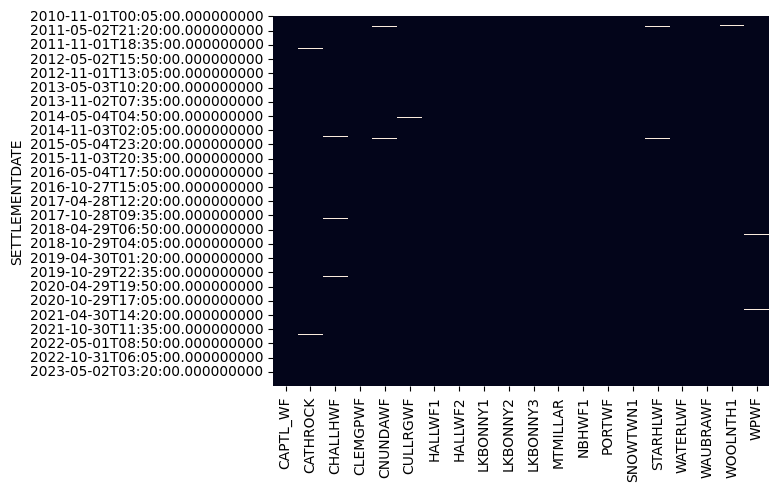

In [40]:
sns.heatmap(df.iloc[:,:20].isnull(), cbar=False)
plt.show()

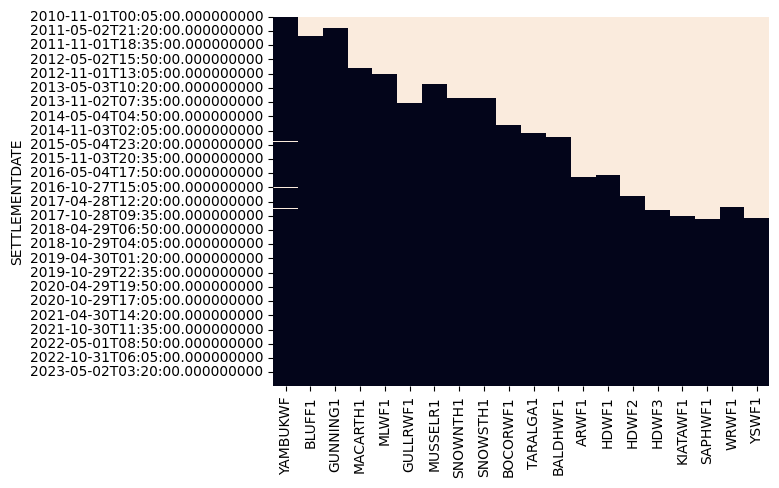

In [41]:
sns.heatmap(df.iloc[:,20:40].isnull(), cbar=False)
plt.show()

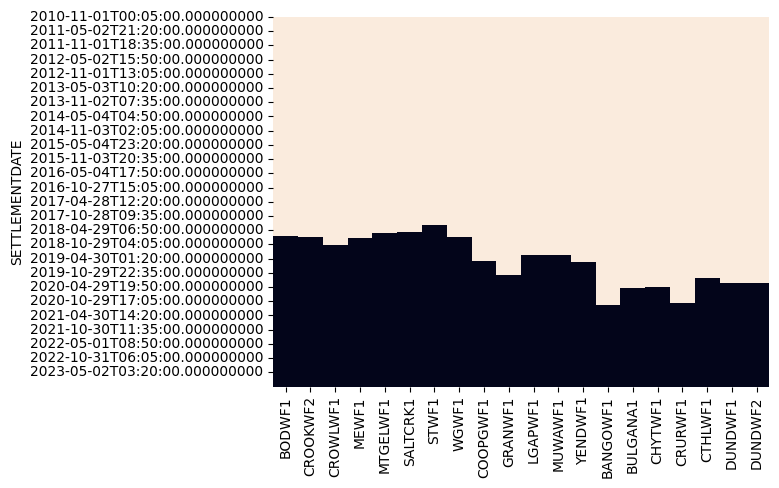

In [42]:
sns.heatmap(df.iloc[:,40:60].isnull(), cbar=False)
plt.show()

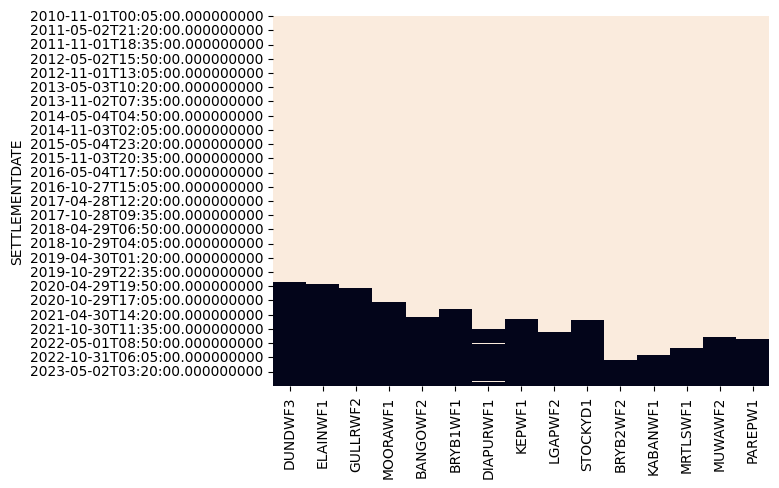

In [43]:
sns.heatmap(df.iloc[:,60:].isnull(), cbar=False)
plt.show()

$\rightarrow$ The first 21 wind farms have almost complete data from 2010 onwards.

$\rightarrow$ For most wind farms, we have data availability from 2018 onwards.

$\rightarrow$ For the last ~25 wind farms, data is available only for 1-3 years.

$\rightarrow$ In general, once data is available, there are only very few gaps in the data.

### Wind Power Readings

Here, we visualize the last 200 measurements for each wind farm in the data set.

In [49]:
n = df.shape[0]

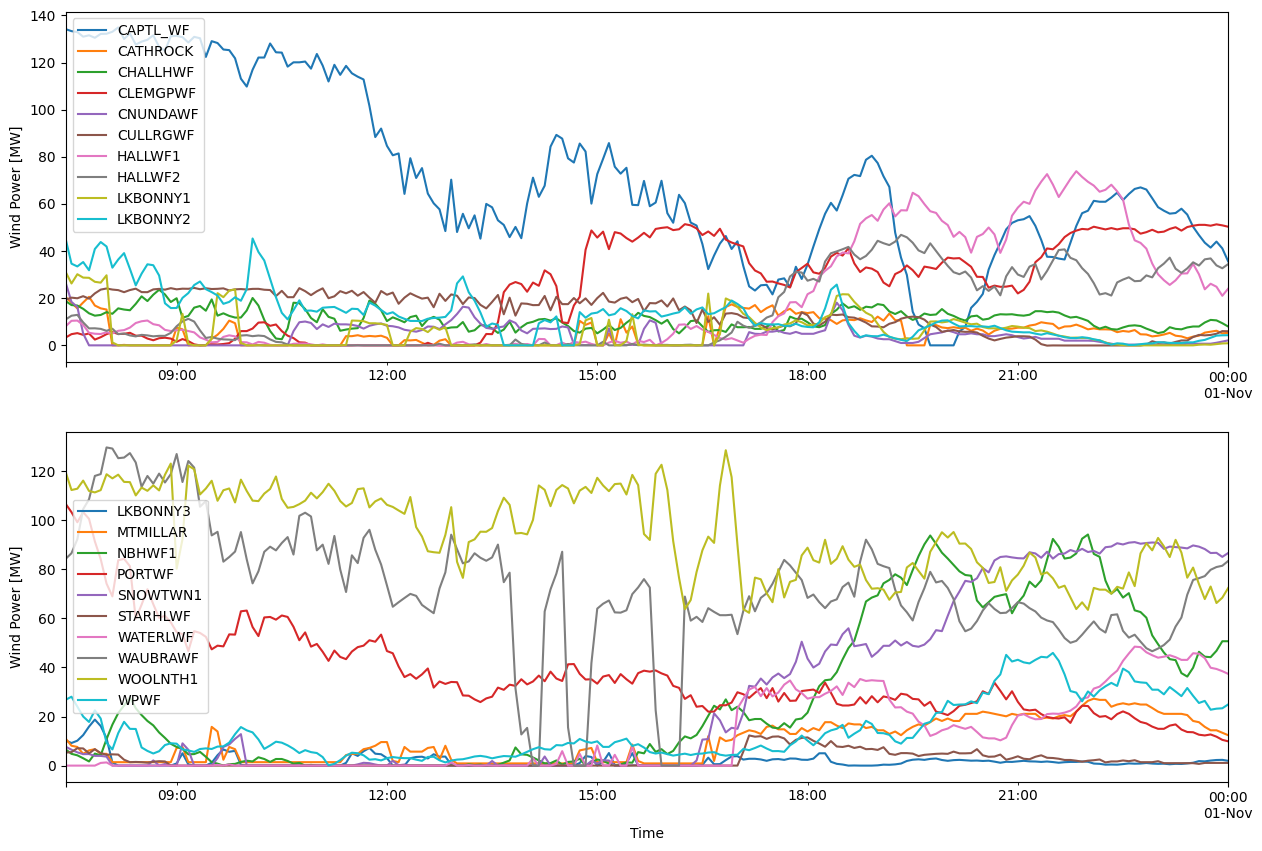

In [65]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
df.iloc[n-200:,:10].plot(ax=axs[0])
df.iloc[n-200:,10:20].plot(ax=axs[1])
axs[0].set_ylabel("Wind Power [MW]")
axs[1].set_ylabel("Wind Power [MW]")
axs[0].set_xlabel("")
axs[1].set_xlabel("Time")
plt.show()

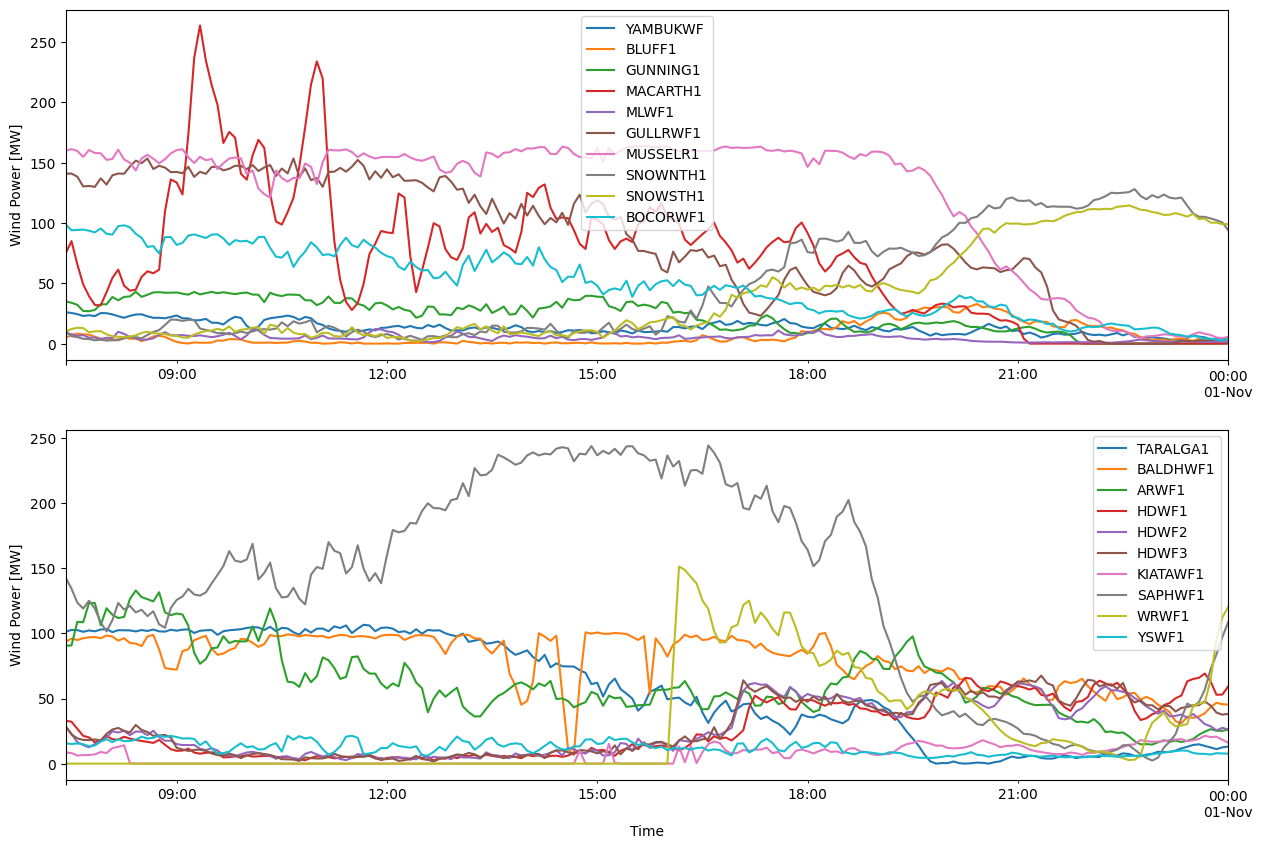

In [66]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
df.iloc[n-200:,20:30].plot(ax=axs[0])
df.iloc[n-200:,30:40].plot(ax=axs[1])
axs[0].set_ylabel("Wind Power [MW]")
axs[1].set_ylabel("Wind Power [MW]")
axs[0].set_xlabel("")
axs[1].set_xlabel("Time")
plt.show()

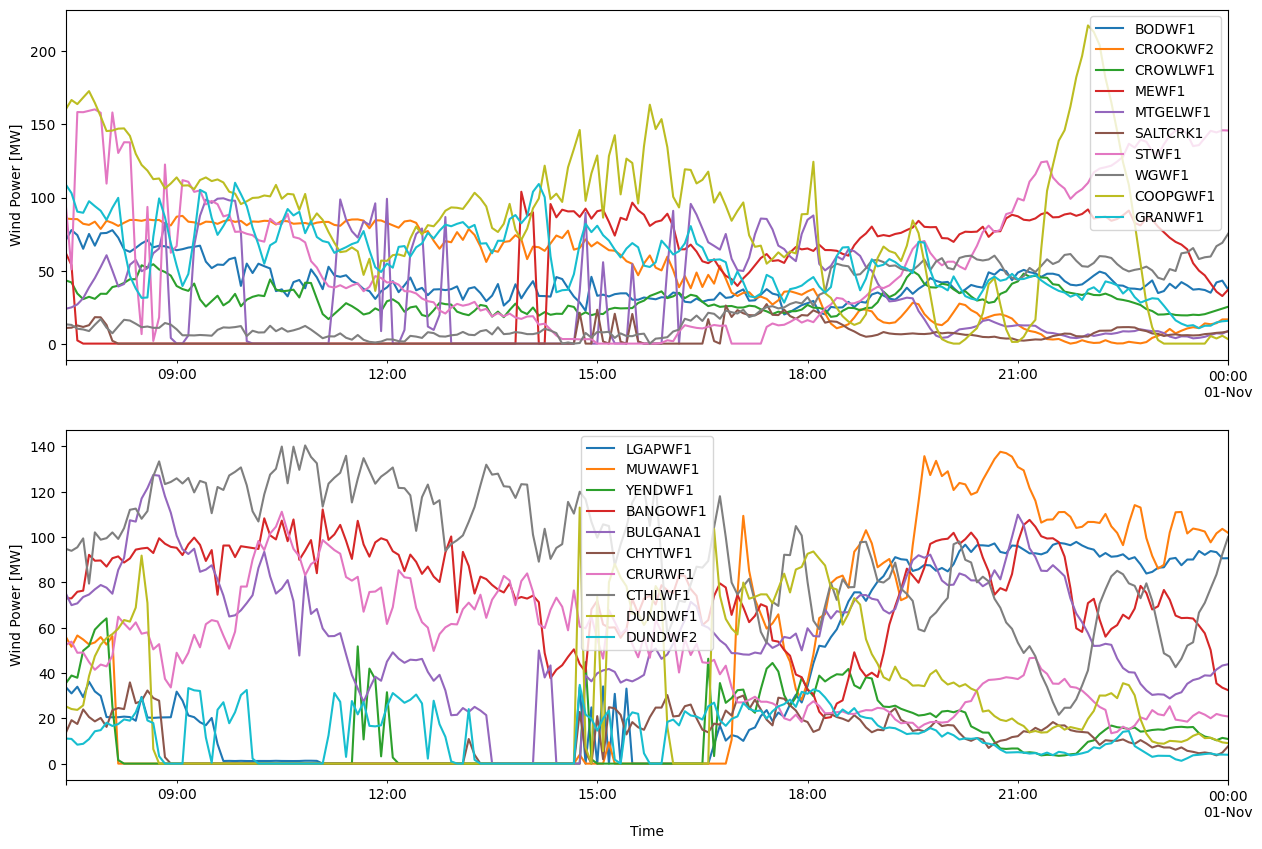

In [67]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
df.iloc[n-200:,40:50].plot(ax=axs[0])
df.iloc[n-200:,50:60].plot(ax=axs[1])
axs[0].set_ylabel("Wind Power [MW]")
axs[1].set_ylabel("Wind Power [MW]")
axs[0].set_xlabel("")
axs[1].set_xlabel("Time")
plt.show()

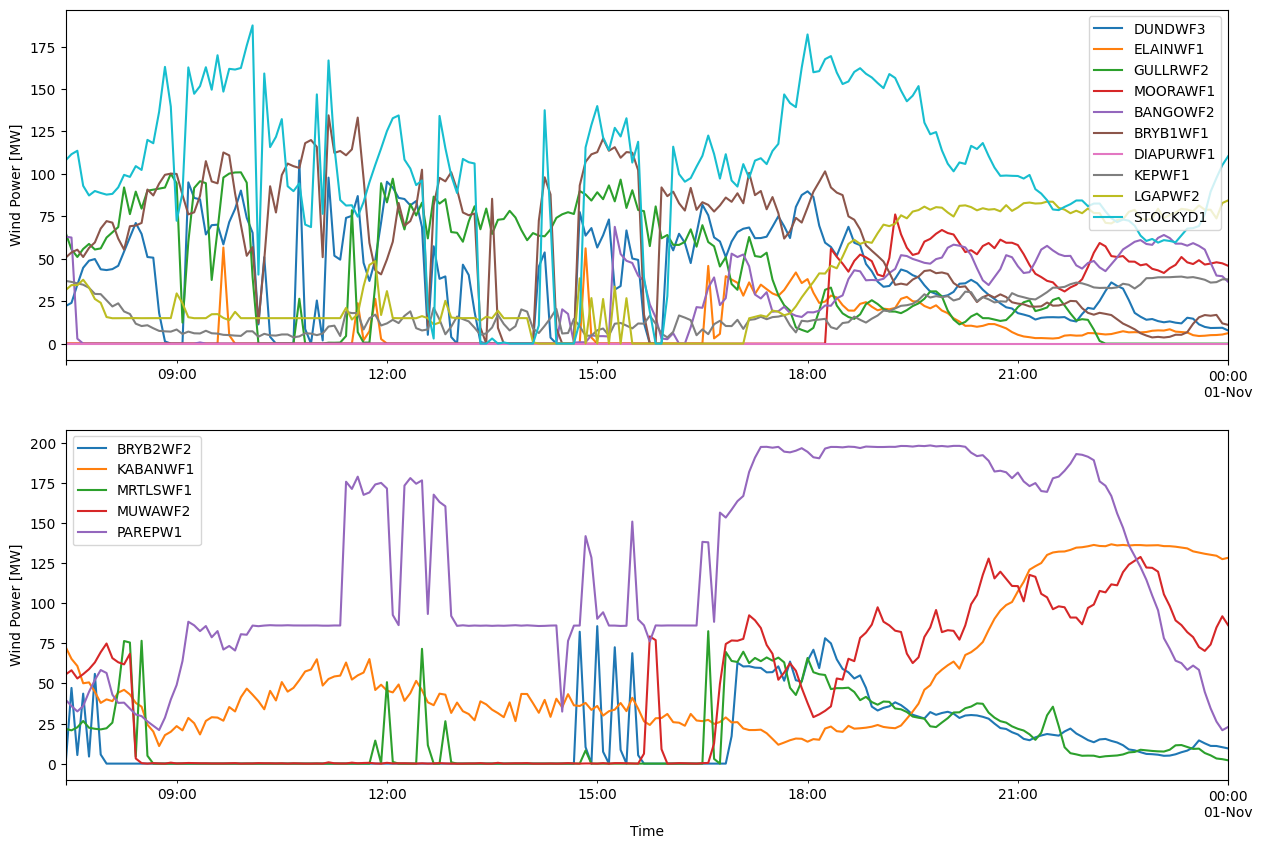

In [68]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
df.iloc[n-200:,60:70].plot(ax=axs[0])
df.iloc[n-200:,70:].plot(ax=axs[1])
axs[0].set_ylabel("Wind Power [MW]")
axs[1].set_ylabel("Wind Power [MW]")
axs[0].set_xlabel("")
axs[1].set_xlabel("Time")
plt.show()

$\rightarrow$ There are significant periods where 0MW is measured, which has to be dealt with carefully.

### Wind Farm Locations

In [69]:
df_loc = pd.read_excel(f'{datapath}locations_wind_farms.xlsx')

In [70]:
df_loc

,Abbreviation,Farm Name,Latitude,Longitude
0,BANGOWF1,Bango 973 Wind Farm,-34.560000,148.790000
1,BANGOWF2,Bango 999 Wind Farm,-34.560000,148.790000
2,BOCORWF1,Boco Rock Wind Farm,-36.580000,149.080000
3,BODWF1,Bodangora Wind Farm,-32.396000,149.067000
4,CAPTL_WF,Capital Wind Farm,-35.145800,149.567100
...,...,...,...,...
74,STOCKYD1,Stockyard Hill Wind Farm,-37.551900,143.314310
75,WAUBRAWF,Waubra Wind Farm,-37.365533,143.624289
76,YAMBUKWF,Yambuk Wind Farm,-38.280000,141.960000
77,YENDWF1,Yendon Wind Farm,-37.630160,144.021860


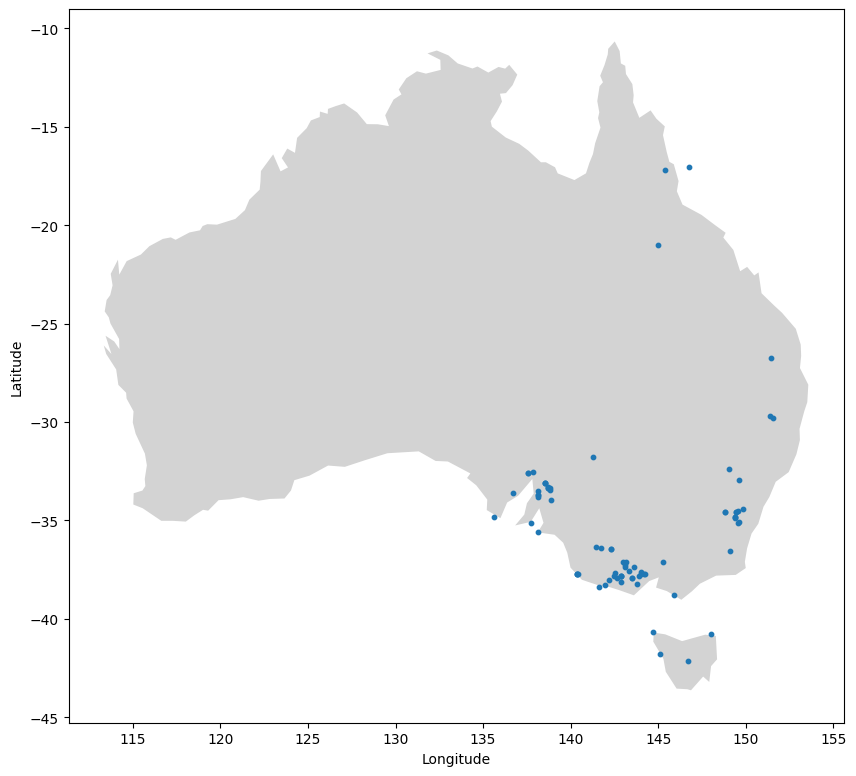

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)
df_loc.plot(x="Longitude", y="Latitude", kind="scatter", s=10, ax=ax)
plt.show()

### Spatial Correlations

We are interested in how strongly the wind power production of several wind farms is correlated. Computing correlations on the raw data might give misleading results, as sometimes, individual wind farms produce 0MW because of maintenance, for example, and this would not reflect actual spatial correlation. Therefore, we compute the pearson correlation for each pair of wind farms, excluding time windows where at least one of the two wind farms measured MW = 0. Moreover, we only take time intervals into account where measurements exist.

In [164]:
# Initialize an empty correlation matrix
corr_mat = np.array([[None]*df.shape[1]]*df.shape[1])

In [165]:
# Iterate over unique pairs of columns
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j:
            # Exclude rows with missing values or zeros in one of the two columns
            df_temp = df[[col1, col2]].dropna()
            df_cleaned = df_temp[(df_temp != 0).all(axis=1)]
            # Compute correlation
            corr_mat[i,j] = df_cleaned[col1].corr(df_cleaned[col2], method='pearson')
            corr_mat[j,i] = corr_mat[i,j]

In [169]:
# set diagonal values to 1 (self-correlation)
for i in range(corr_mat.shape[0]):
    corr_mat[i, i] = 1

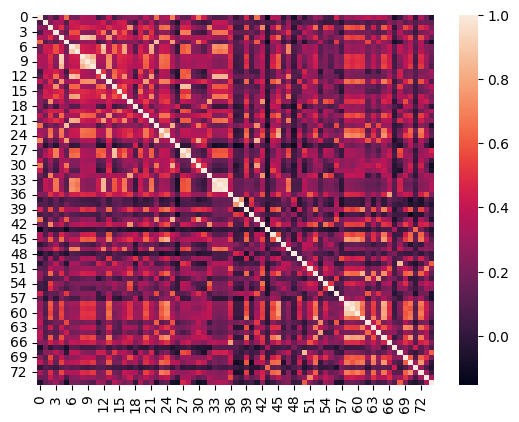

In [174]:
sns.heatmap(pd.DataFrame(corr_mat.astype(float)))
plt.show()

Let us check how many pairs have a correlation $\geq \rho$, where $\rho \in \{0.5, 0.6, 0.7, 0.8, 0.9\}$.

In [176]:
# Initialize lists to store the wind farm pairs
geq05 = []
geq06 = []
geq07 = []
geq08 = []
geq09 = []

# Iterate over unique pairs of columns
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j:
            if corr_mat[i,j] >= 0.5:
                geq05.append([col1, col2])
            if corr_mat[i,j] >= 0.6:
                geq06.append([col1, col2])
            if corr_mat[i,j] >= 0.7:
                geq07.append([col1, col2])
            if corr_mat[i,j] >= 0.8:
                geq08.append([col1, col2])
            if corr_mat[i,j] >= 0.9:
                geq09.append([col1, col2])

In [181]:
print(f"corr > 0.5 for {len(geq05)} wind farms,")
print(f"corr > 0.6 for {len(geq06)} wind farms,")
print(f"corr > 0.7 for {len(geq07)} wind farms,")
print(f"corr > 0.8 for {len(geq08)} wind farms,")
print(f"corr > 0.9 for {len(geq09)} wind farms.")

corr > 0.5 for 363 wind farms,
corr > 0.6 for 211 wind farms,
corr > 0.7 for 77 wind farms,
corr > 0.8 for 32 wind farms,
corr > 0.9 for 8 wind farms.


The pairs of wind farms with a particularly high correlation are:

In [183]:
print(geq09)

[['CNUNDAWF', 'LKBONNY1'], ['CNUNDAWF', 'LKBONNY2'], ['LKBONNY1', 'LKBONNY2'], ['LKBONNY2', 'LKBONNY3'], ['HDWF1', 'HDWF2'], ['HDWF1', 'HDWF3'], ['HDWF2', 'HDWF3'], ['DUNDWF1', 'DUNDWF2']]


Let's look at these on the map:

In [190]:
# prepare list of highly correlated farms
highcorrfarms = []
for farmpair in geq09:
    if farmpair[0] not in highcorrfarms:
        highcorrfarms.append(farmpair[0])
    if farmpair[1] not in highcorrfarms:
        highcorrfarms.append(farmpair[1])
print(highcorrfarms)

['CNUNDAWF', 'LKBONNY1', 'LKBONNY2', 'LKBONNY3', 'HDWF1', 'HDWF2', 'HDWF3', 'DUNDWF1', 'DUNDWF2']


In [209]:
# extract these from df_loc:
df_loc_highcorr = df_loc[df_loc['Abbreviation'].isin(highcorrfarms)]

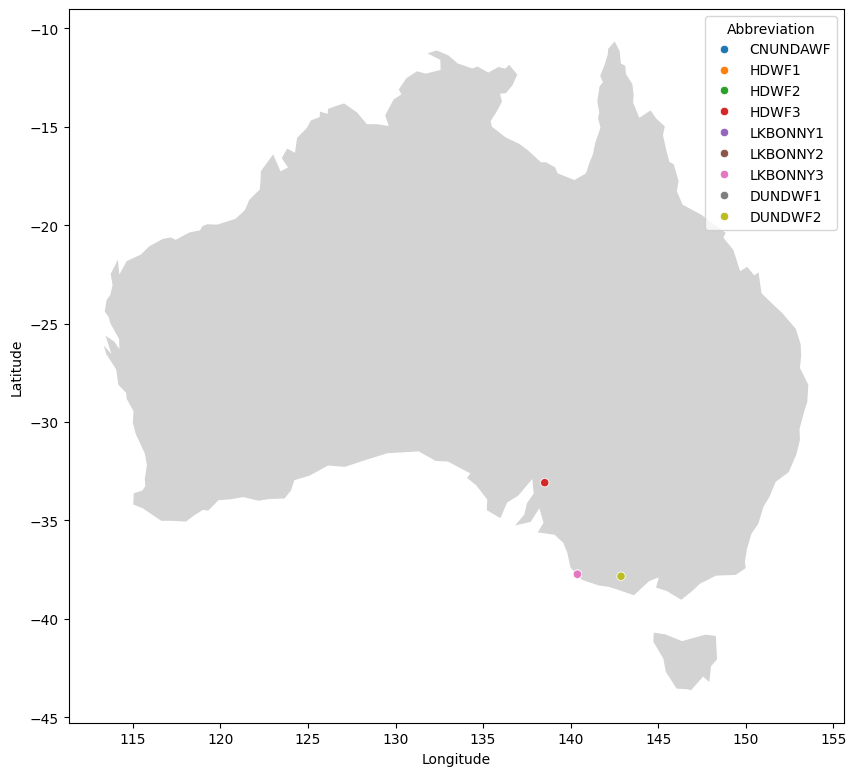

In [210]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(10, 10))
world[world["name"] == "Australia"].plot(color="lightgrey", ax=ax)
sns.scatterplot(data=df_loc_highcorr, x='Longitude', y='Latitude', hue='Abbreviation', ax=ax)
plt.show()

In [211]:
df_loc_highcorr

,Abbreviation,Farm Name,Latitude,Longitude
24,CNUNDAWF,Canunda Wind Farm,-37.73400,140.39500
27,HDWF1,Hornsdale Wind Farm,-33.08587,138.51836
28,HDWF2,Hornsdale Wind Farm 2,-33.08587,138.51836
29,HDWF3,Hornsdale Wind Farm 3,-33.08587,138.51836
32,LKBONNY1,Lake Bonney Wind Farm Stage 1,-37.73784,140.38703
33,LKBONNY2,Lake Bonney Stage 2 Windfarm,-37.73784,140.38703
34,LKBONNY3,Lake Bonney Stage 3 Wind Farm,-37.73784,140.38703
58,DUNDWF1,Dundonnell Wind Farm,-37.84122,142.87587
59,DUNDWF2,Dundonnell Wind Farm,-37.84122,142.87587


$\rightarrow$ The LKBONNY farms are on the same spot, same for HDWF and DUNDWF farms. CNUNDAWF is very close to the LKBONNY farms. This explains their high correlations.